In [1]:
import xarray as xr

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

from bs_fdbck.constants import measurements_path, path_outdata, path_extract_latlon_outdata

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [2]:
xr.set_options(keep_attrs=True) 

In [3]:
path_extract_latlon_outdata

PosixPath('/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/extracted_latlon_subset')

In [4]:
lat_smr = 61.85
lon_smr = 24.28

In [5]:
case_name = 'OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full'

In [6]:
fn = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0.nc'
fn_comb_lev1 = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0_lev1.nc'

In [7]:
fn2 = fn.parent / f'{fn.stem}_sort.nc'

In [8]:


cases = [case_name]

In [9]:
from pathlib import Path

In [10]:
plot_path = Path('Plots')

In [11]:
def make_fn(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [12]:
plot_path.mkdir(exist_ok=True, parents=True)

In [13]:
varl =['DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       #'TAUTLOGMODIS',
       #'MEANTAU_ISCCP',
       #'LWPMODIS','CLWMODIS','REFFCLWMODIS',#'TAUTMODIS','TAUWMODIS',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [14]:
varl_st = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3']

## Load observations: 

## Open model dataset: 


In [15]:
model_lev_i=-1

In [ ]:
ds_mod = xr.open_dataset(fn, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
#ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

In [17]:
ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')

ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))



In [18]:
ds_mod = ds_mod.isel(lev = model_lev_i)

ds_mod1

In [19]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [20]:
delayed_obj = ds_mod.to_netcdf(fn_comb_lev1, compute=False)
with ProgressBar(): 
    results = delayed_obj.compute()

[########################################] | 100% Completed | 37min 34.7s


In [16]:
import dask.array as da
from dask.diagnostics import ProgressBar

delayed_obj = ds_mod1.to_netcdf(fn1_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()
    
    

delayed_obj = ds_mod2.to_netcdf(fn2_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()

ds_mod = xr.open_mfdataset([fn1_2,fn2_2], combine='by_coords', concat_dim='time')

In [17]:
ds_mod = xr.open_dataset(fn_comb_lev1, chunks = {'time':48})

In [18]:
ds_mod.compute()

KeyboardInterrupt: 

In [ ]:
ds_mod.load()

Somehow unsorted

In [ ]:
ds_all = ds_mod

In [ ]:
ds_all[varl]

### Select hyytiala grid cell: 

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')


model_lev_i=-1
ds_sel = ds_mod.sel(lat = lat_smr, lon= lon_smr, method='nearest').isel( lev=model_lev_i)#.load()
ds_all = ds_mod.isel(lev=model_lev_i)#.load()

#ds_sel.load()
#ds_all.load()

ds_all.to_netcdf(fn_comb_lev1)

In [ ]:
model_lev_i=-1

ds_all = xr.open_dataset(fn_comb_lev1).isel(ilev=model_lev_i)
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()

In [ ]:
ds_mod = ds_all

In [ ]:
ds_all['ACTNL'].isel(lat=0).plot()

In [ ]:
dic_ds=dict()
dic_ds[case_name]= ds_mod

### Broadcast ds_sel to same grid 

Copying the same for as hyytiala for all grid cells for the station variables (st measurements) 

In [ ]:
ds_all = ds_all.isel(ilev=-1,cosp_tau_modis=0,  
                                                                        cosp_tau=0,
                                                                       cosp_dbze=0,
                                                                        cosp_ht=0, 
                                                                        cosp_prs = 0,
                                                                       cosp_reffice=0,
                                                                        cosp_htmisr=0,
                                                                        cosp_reffliq=0,
                                                                        cosp_scol=0,
                                                                        cosp_sr=0,
                                                                        cosp_sza=0,
                                                                        nbnd=0
                                                                       ).squeeze()

In [ ]:
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')

In [ ]:
ds_all#.squeeze()

In [ ]:
ds_all 

In [ ]:
ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
for v in varl_st:
    ds_all[v] = ds_1[v]

In [ ]:
ds_all

### Set dic_ds : 

In [ ]:
dic_ds = dict()
dic_ds[case_name] =ds_all

Constants:

In [ ]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [ ]:
ds_all.load()

In [ ]:
def get_dic_df_mod(model_lev_i=-1):
    


    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        #ds['TOT_ICLD_VISTAU_s']= ds['TOT_ICLD_VISTAU'].sum('lev')
        #ds['TOT_CLD_VISTAU_s']= ds['TOT_CLD_VISTAU'].sum('lev')
        for v in ['TGCLDLWP','TGCLDIWP','TGCLDCWP']:
            if v in ds.data_vars:
                if ds[v].attrs['units'] =='kg/m2':
                    ds[v] = ds[v]*1000
                    ds[v].attrs['units'] = 'g/m2'
                
        
        ds_sel = ds.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( lev=model_lev_i)

        ds_all = ds#.isel(lev=model_lev_i)
        #ds_sel =ds_sel[varl_st]
        ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
        for v in varl_st:
            ds_all[v] = ds_1[v]
        ds_sel = ds_all
        print(ds_all)
        
        rho = pressure*100/(R*ds_sel['T'])

        ds_sel['rho'] = rho
        ds_sel['ACTNL_incld'] = ds_sel['ACTNL']/ds_sel['FCTL']
        ds_sel['ACTREL_incld'] = ds_sel['ACTREL']/ds_sel['FCTL']

        ds_sel['ACTNL_incld'].plot()

        ds_sel_median = ds_sel.resample({'time':'D'}).median()


        #df = ds_sel_median.to_dataframe()

        ls_so4 = [c for c in ds_sel_median.data_vars if 'SO4_' in c]#['SO4_NA']

        ls_so4

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel_median[s].attrs['units']!=un:
                ds_sel_median[s] = ds_sel_median[s]*ds_sel_median['rho']*kg2ug
                ds_sel_median[s].attrs['units']=un
        #ds_sel_med= ds_sel_median.resample(time='D').median()

        df = ds_sel_median.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
        
        df['ACTNL_incld'] = df['ACTNL']/df['FCTL']
        df['ACTREL_incld'] = df['ACTREL']/df['FCTL']
        
    
        df_daily = df#.resample('D').median()

        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.get_level_values(0).year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        #df_s.index = df_s.index.rename('date')
        df_merge = df_s#pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.get_level_values(0).year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df[months]
        ds_month_mask = ds_sel.where((ds_sel['time.month']==7) | (ds_sel['time.month']==8))
        ds_sel_med_y= ds_month_mask.resample(time='Y').median()
        df_ym =ds_sel_med_y.to_dataframe()
        #df_ym = df_s.resample('Y').median()
        #df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_merge
        print(ca)

    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

In [ ]:
dic_df_sm[case_name].columns

In [ ]:
df_mod = dic_df_sm[case_name]

In [ ]:
df_mod.index.get_level_values(1)

In [ ]:
mask_liq_cloudtop = df_mod['FCTL']>0.0001

In [ ]:
df_mod['mask_liq_cloudtop'] = mask_liq_cloudtop

In [ ]:
sel_latlon = (df_mod.index.get_level_values(2)==27.5)&(df_mod.index.get_level_values(1)==61.57894736842104)

df_mod[sel_latlon].reset_index().set_index('time')['TGCLDLWP'].plot()

<AxesSubplot:xlabel='time'>

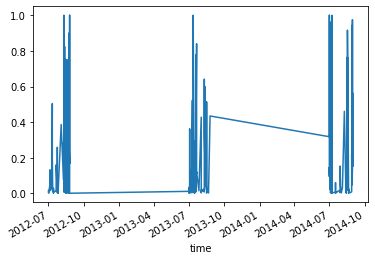

In [97]:
df_mod[mask_liq_cloudtop].reset_index().set_index('time')['FCTL'].plot()#ylim=[-.0,.01])

#### Mask values that don't have cloud top liquid

In [98]:
df_mod = df_mod[df_mod['mask_liq_cloudtop']]

In [99]:
df_mod['CWP_qcut']=pd.qcut(df_mod['TGCLDLWP'],6)# bins=bins, labels=labels)§

df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)



/tmp/ipykernel_6942/3249190625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_qcut']=pd.qcut(df_mod['TGCLDLWP'],6)# bins=bins, labels=labels)§
/tmp/ipykernel_6942/3249190625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)


In [100]:
bins = pd.IntervalIndex.from_breaks([ 10,  30,  50,  70, 90, 110, 130,500])


df_mod['CWP_cut']=pd.cut(df_mod['TGCLDLWP'], bins=bins)#, labels=labels)

df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)

/tmp/ipykernel_6942/826289808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_cut']=pd.cut(df_mod['TGCLDLWP'], bins=bins)#, labels=labels)
/tmp/ipykernel_6942/826289808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)


## Category of OA concentration

In [101]:
df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)

/tmp/ipykernel_6942/1026901322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
/tmp/ipykernel_6942/1026901322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)


In [102]:
#df_mod['OA_low'].loc[:,:] = df_mod['OA']<df_mod['OA'].quantile(.34)
mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
df_mod['OA_mid_range'] = mid_range

/tmp/ipykernel_6942/1710207095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['OA_mid_range'] = mid_range


In [103]:

df_mod=df_mod.assign(OA_category= pd.NA)
df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'



In [104]:
df_mod[(df_mod.index.get_level_values('lat') >65)& (df_mod.index.get_level_values('lon') == 25.0)]

,,,ABSVIS,ACTNI,ACTNL,ACTREI,ACTREL,AEROD_v,AOD_VIS,AREL,ASYMMDRY,AWNC,...,T_C,mask_liq_cloudtop,CWP_qcut,CWP_qcutl,CWP_cut,CWP_cutl,OA_low,OA_high,OA_mid_range,OA_category
time,lat,lon,,,,,,,,,,,,,,,,,,,,,
2012-07-01,65.368421,25.0,0.002457,4.227927,1.418949e+04,0.401859,0.055691,NaN,0.086656,0.0,0.647944,0.0,...,18.852417,True,"(11.058, 32.049]",21.5535,"(10.0, 30.0]",20.0,False,False,True,<NA>
2012-07-14,65.368421,25.0,0.002038,40.897545,3.809550e+04,0.945163,0.081165,NaN,0.046543,0.0,0.615721,0.0,...,17.097900,True,"(1.066, 11.058]",6.0620,NaN,NaN,True,False,False,OA low
2012-07-21,65.368421,25.0,0.001371,0.000000,8.877408e+05,0.000000,1.133685,NaN,0.033576,0.0,0.641800,0.0,...,12.361542,True,"(32.049, 64.857]",48.4530,"(30.0, 50.0]",40.0,True,False,False,OA low
2012-07-24,65.368421,25.0,0.002165,0.000000,4.413432e+05,0.000000,0.190835,NaN,0.075215,0.0,0.655297,0.0,...,18.355621,True,"(1.066, 11.058]",6.0620,NaN,NaN,False,False,True,<NA>
2012-08-10,65.368421,25.0,0.001949,0.000000,4.464656e+07,0.000000,6.942228,NaN,0.052140,0.0,0.682081,0.0,...,13.204926,True,"(11.058, 32.049]",21.5535,"(10.0, 30.0]",20.0,True,False,False,OA low
2012-08-14,65.368421,25.0,0.002878,0.000000,8.979200e+02,0.000000,0.030646,NaN,0.061212,0.0,0.541110,0.0,...,18.548218,True,"(-0.001, 1.066]",0.5325,NaN,NaN,False,True,False,OA high
2012-08-15,65.368421,25.0,0.003036,0.000000,3.059857e+07,0.000000,6.657866,NaN,0.064081,0.0,0.513083,0.0,...,17.707458,True,"(64.857, 122.171]",93.5140,"(50.0, 70.0]",60.0,False,True,False,OA high
2012-08-16,65.368421,25.0,0.003184,0.000000,4.280450e+07,0.000000,10.145891,NaN,0.068251,0.0,0.536688,0.0,...,17.531006,True,"(122.171, 802.392]",462.2815,"(130.0, 500.0]",315.0,False,True,False,OA high
2012-08-17,65.368421,25.0,0.003256,0.000000,4.536031e+07,0.000000,10.100775,NaN,0.067721,0.0,0.542957,0.0,...,15.991913,True,"(122.171, 802.392]",462.2815,"(130.0, 500.0]",315.0,False,True,False,OA high


In [105]:
import seaborn as sns

206


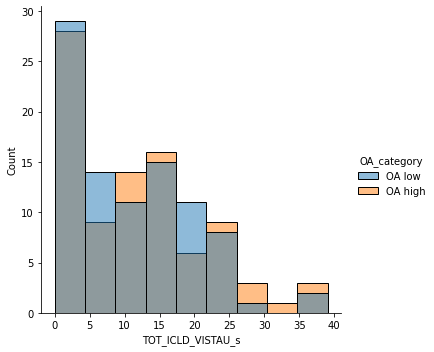

In [106]:
_df = (df_mod[(df_mod['OA_category'].notna()) & (df_mod['TOT_ICLD_VISTAU_s']>0)])
_df = _df[_df['TOT_ICLD_VISTAU_s']<50]
sns.displot(#x='TGCLDLWP', 
            x='TOT_ICLD_VISTAU_s',
            data=_df,
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])
print(len(df_mod[df_mod['OA_category'].notna()]))

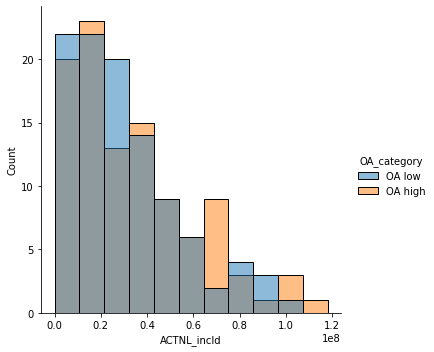

In [107]:
sns.displot(#x='TGCLDLWP', 
            x='ACTNL_incld',
            data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])

In [108]:
import seaborn as sns

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


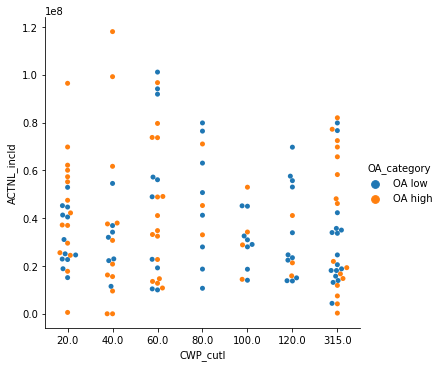

In [109]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


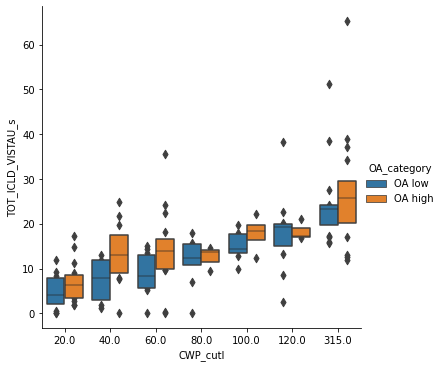

In [110]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


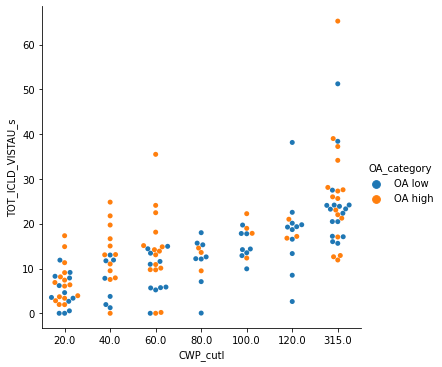

In [111]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            #data=df_mod.reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


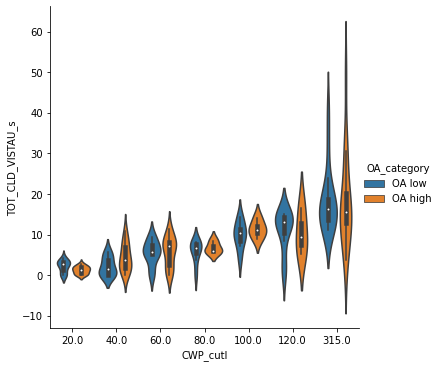

In [112]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='violin',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


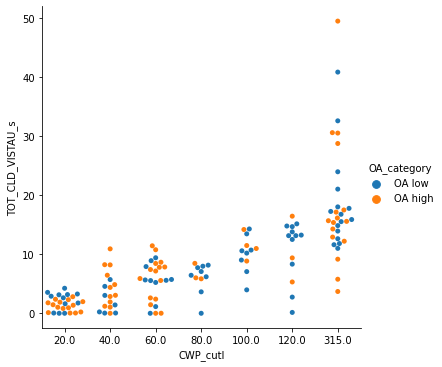

In [113]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='swarm',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


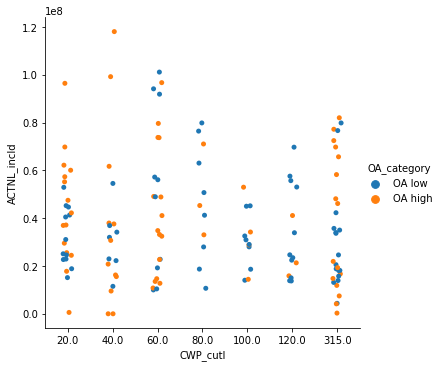

In [114]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
           # kind='box'
           )

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


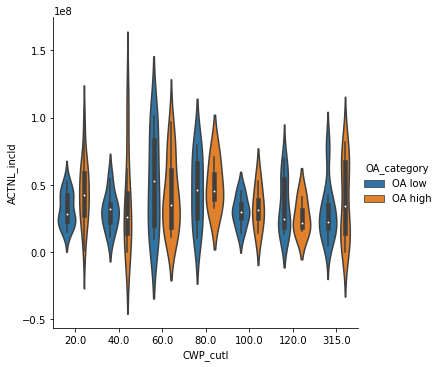

In [115]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
            kind='violin'
           )

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(0.0, 25.0)

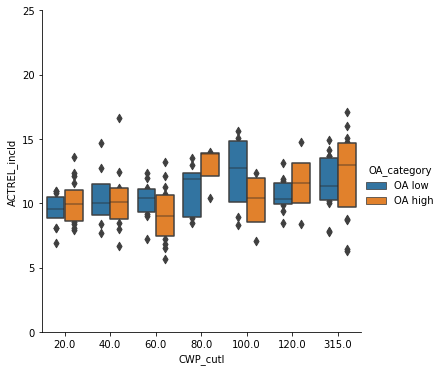

In [116]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
plt.ylim([0,25])

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(0.0, 25.0)

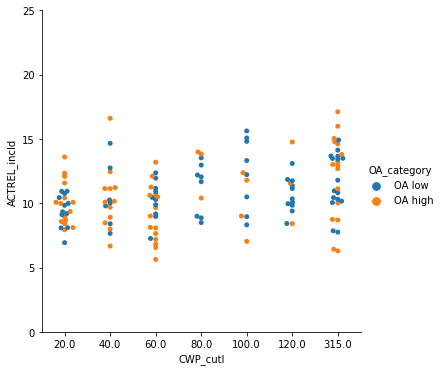

In [117]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='swarm',
           )
plt.ylim([0,25])